分類→分類結果をフラグとして特徴量に追加して回帰

## 必要なライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# 予測したいデータの読み込み
path_test_preprp = '../../../../data/processed/test_processed_30.csv'

test = pd.read_csv(path_test_preprp)

## 保存されたモデルを使って予測を行う

In [3]:
n_folds = 5
predictions_cls = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_31_cls/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions_cls += fold_predictions

# 平均を取る
predictions_cls /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions_cls, squared=False)
    print(f'RMSE={score}')


In [4]:
# 予測結果を出力する
print(predictions_cls)

[0.97266375 0.99660569 0.99217388 ... 0.99216138 0.96138326 0.99333281]


In [8]:
print(len(predictions_cls[predictions_cls<0.9]))
print(predictions_cls.min())

# 予測結果を出力する
print(predictions_cls)

predictions_cls_done = np.where(predictions_cls < 0.9, 0, 1)

1243
0.6367827945311937
[0.97266375 0.99660569 0.99217388 ... 0.99216138 0.96138326 0.99333281]


In [9]:
test['flag'] = predictions_cls_done

In [10]:
test

,first_active_month,card_id,feature_1,feature_2,feature_3,elapsed_time,quarter,days_feature1,days_feature2,days_feature3,...,total_duration_max,total_duration_mean,total_amount_month_ratio_min,total_amount_month_ratio_max,total_amount_month_ratio_mean,total_duration,ratio_amount_total,ratio_amount_mean,ratio_merchant_category_nu,flag
0,1978,C_ID_0ab67a22ab,3,3,1,306,2,918,918,306,...,51666.0,7779.549296,0.025316,8.278481,1.250920,330,0.045998,1.042612,0.187500,1
1,1888,C_ID_130fd0cbdd,2,3,0,396,1,792,1188,0,...,54593.0,5825.022989,0.051948,9.207792,0.982607,462,0.085422,0.740325,0.500000,1
2,2100,C_ID_b709037bc5,5,1,1,184,3,920,184,184,...,167706.0,54367.133333,0.194805,28.285714,9.169697,199,0.117430,0.763294,0.250000,1
3,2222,C_ID_d27d835a9f,2,1,0,62,4,124,62,0,...,42812.0,10590.388889,0.129870,7.220779,1.793936,134,0.300996,0.782590,0.555556,1
4,1491,C_ID_2b5e3df5c2,5,1,1,793,4,3965,793,793,...,847000.0,54698.353448,0.000000,142.857143,9.229007,464,0.154201,2.827010,0.161290,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123618,2161,C_ID_7a239d2eda,2,2,0,123,4,246,246,0,...,11172.0,3575.301370,0.129870,1.934211,0.607829,134,0.000000,0.000000,0.000000,1
123619,2131,C_ID_75ace375ae,3,1,1,153,3,459,153,153,...,10780.0,2995.363636,0.051948,1.818182,0.505422,206,1.047847,1.833732,1.000000,1
123620,1766,C_ID_21d56d950c,5,1,1,518,3,2590,518,518,...,123585.0,29135.972973,0.415584,20.844156,4.922341,305,0.000000,0.000000,0.000000,1
123621,2039,C_ID_6c46fc5a9d,2,1,0,245,2,490,245,0,...,34020.0,6241.794118,0.074074,5.185185,0.953531,177,0.097719,1.009765,0.333333,1


In [15]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_31_reg/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [16]:
# 予測結果を出力する
print(predictions)

[-0.30438461 -0.14681513 -0.30582037 ...  1.05354969 -0.94639092
  0.14231294]


## 提出用ファイルの作成

In [17]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_31.csv", index=False)

(array([3.000e+00, 4.000e+00, 6.000e+00, 1.000e+01, 1.500e+01, 2.600e+01,
        3.200e+01, 3.200e+01, 4.300e+01, 3.400e+01, 5.400e+01, 6.000e+01,
        7.100e+01, 6.800e+01, 6.900e+01, 6.900e+01, 6.000e+01, 6.900e+01,
        7.600e+01, 6.100e+01, 5.400e+01, 4.900e+01, 5.700e+01, 4.800e+01,
        4.400e+01, 3.300e+01, 3.600e+01, 2.200e+01, 1.200e+01, 9.000e+00,
        8.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

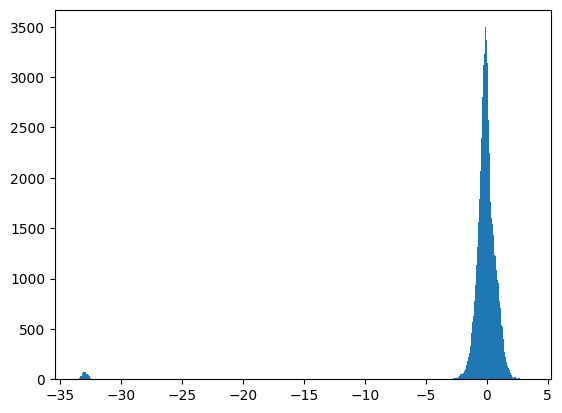

In [19]:
import matplotlib.pyplot as plt
#plt.yscale('log')
plt.hist(sub_df.target, bins=1000)
#plt.hist(predictions[predictions<0], bins=100)

(array([1.243e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

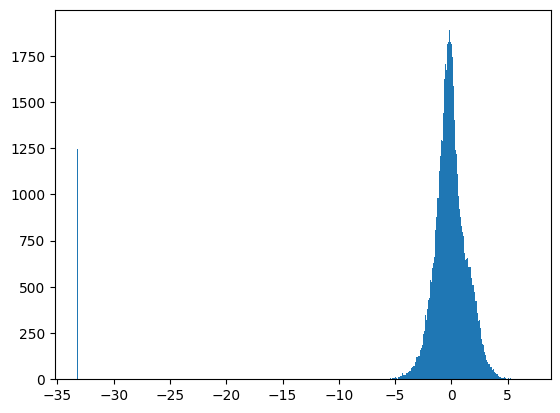

In [25]:
df = sub_df.copy()
df.target = df.target.apply(lambda x: np.log2(1e-10) if x < -30 else x)
df.target = df.target.apply(lambda x: x*2. if x > -30 else x)
plt.hist(df.target, bins=1000)

In [26]:
df.to_csv("../submit_oshikiri_31_2.csv", index=False)